## Background

In this blog post I dive deeply into the internals of the RAGatouille and ColBERT libraries to understand the intermediate steps taken when building an index for a collection of documents.

- RAGatouille
    - ragatouille/RAGPretrainedModel.py
        - [`_process_corpus`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/RAGPretrainedModel.py#L129)
        - [`index`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/RAGPretrainedModel.py#L171)
    - ragatouille/models/colbert.py
        - [`index`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/models/colbert.py#L294)
    - ragatouille/models/index.py
        - [`ModelIndexFactory.construct`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/models/index.py#L460)
        - [`PLAIDModelIndex.construct`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/models/index.py#L132)
        - [`PLAIDModelIndex.build`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/models/index.py#L156)
        - [`indexer.index`](https://github.com/AnswerDotAI/RAGatouille/blob/2bd4d2ed01c847854be78704a012f9ab35d679b2/ragatouille/models/index.py#L212)
- ColBERT
    - colbert/indexer.py
        - [`Launcher(encode)`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexer.py#L85)
    - colbert/indexing/collection_indexer.py
        - [`encode`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L31)
        - [`Collection.cast`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L51)
        - [`CollectionIndexer.run`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L61)
            - [`CollectionIndexer.setup`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L80)
                - [`CollectionIndexer._sample_pids`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L114)
                - [`CollectionIndexer._sample_embeddings`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L133)
                    - colbert/indexing/collection_encoder.py: [`CollectionEncoder.encode_passages`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_encoder.py#L13)
                    - [`Checkpoint.docFromText`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/modeling/checkpoint.py#L122)
                        - [`ColBERT.doc`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/modeling/colbert.py#L95)
                - [`CollectionIndexer._save_plan`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L210)
            - [`CollectionIndexer.train`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L226)
                - [`compute_faiss_kmeans`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L500)
                - [`CollectionIndexer._compute_avg_residual`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L314)
                    - [`ResidualCodec.compress_into_codes`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/codecs/residual.py#L204)
                    - [`ResidualCodec.lookup_centroids`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/codecs/residual.py#L222)
                - [`IndexSaver.save_codec`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/index_saver.py#L17)
            - [`CollectionIndexer.index`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L346)
                - colbert/indexing/collection_encoder.py: [`CollectionEncoder.encode_passages`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_encoder.py#L13)
                - [`IndexSaver.save_chunk`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/index_saver.py#L70)
                - [`ResidualCodec.compress`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/codecs/residual.py#L167)
                    - [`ResidualCodec.binarize`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/codecs/residual.py#L186)
            - [`CollectionIndexer.finalize`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L378)
                - [`CollectionIndexer._build_ivf`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L438)
                - [`optimize_ivf`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/utils.py#L8)
                - [`CollectionIndexer._update_metadata`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/collection_indexer.py#L484)
    

In [ ]:
!pip install datasets ragatouille -qq

In [2]:
from datasets import load_dataset
from ragatouille import RAGPretrainedModel
from fastcore.utils import Path
import torch
import srsly
import uuid
from ragatouille.data import CorpusProcessor
from llama_index.core.text_splitter import SentenceSplitter
import pandas as pd
from ragatouille.models.index import PLAIDModelIndex
from colbert.infra import ColBERTConfig, RunConfig
from colbert.data.collection import Collection
from colbert.modeling.checkpoint import Checkpoint
from colbert.indexing.collection_encoder import CollectionEncoder
from colbert.indexing.collection_indexer import CollectionIndexer
import numpy as np
import random
from colbert.indexing.collection_indexer import compute_faiss_kmeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from colbert.indexing.codecs.residual import ResidualCodec
from colbert.utils.utils import flatten
import tqdm

In [3]:
def set_all_seeds(seed=123):
    """Set seeds for all random number generators"""
    import random
    import numpy as np
    import torch
    import os

    # Python's random module
    random.seed(seed)

    # NumPy
    np.random.seed(seed)

    # PyTorch
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # For multi-GPU

    # Set PYTHONHASHSEED for reproducibility across runs
    os.environ['PYTHONHASHSEED'] = str(seed)

    # Set deterministic algorithms for PyTorch
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    print(f"All seeds set to {seed}")

# Call this at the beginning of your script
set_all_seeds(123)

All seeds set to 123


## RAGatouille `RAG.index`

Everything in this notebook will be compared to what's generated with `RAG.index`.

For this exercise, I'll use 1000 passages from the UKPLab/DAPR ConditionalQA dataset.

In [4]:
passages = load_dataset("UKPLab/dapr", f"ConditionalQA-corpus", split="test[:1000]")
passages

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/2.72M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/69199 [00:00<?, ? examples/s]

Dataset({
    features: ['_id', 'text', 'title', 'doc_id', 'paragraph_no', 'total_paragraphs', 'is_candidate'],
    num_rows: 1000
})

In [5]:
passages[0]['text']

'Overview'

In [6]:
model_nm = "answerdotai/answerai-colbert-small-v1"

In [7]:
RAG = RAGPretrainedModel.from_pretrained(model_nm)
index_path = RAG.index(index_name="cqa_index", collection=passages['text'])

artifact.metadata:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()


---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Mar 13, 01:15:09] #> Creating directory .ragatouille/colbert/indexes/cqa_index 


[Mar 13, 01:15:11] [0] 		 #> Encoding 1000 passages..


/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()


[Mar 13, 01:15:14] [0] 		 avg_doclen_est = 15.197999954223633 	 len(local_sample) = 1,000
[Mar 13, 01:15:14] [0] 		 Creating 1,024 partitions.
[Mar 13, 01:15:14] [0] 		 *Estimated* 15,197 embeddings.
[Mar 13, 01:15:14] [0] 		 #> Saving the indexing plan to .ragatouille/colbert/indexes/cqa_index/plan.json ..


/usr/local/lib/python3.11/dist-packages/colbert/indexing/collection_indexer.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sub_sample = torch.load(sub_sample_path)


used 20 iterations (0.5189s) to cluster 14439 items into 1024 clusters
[Mar 13, 01:15:14] Loading decompress_residuals_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[Mar 13, 01:16:51] Loading packbits_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[0.015, 0.016, 0.015, 0.015, 0.013, 0.016, 0.015, 0.016, 0.017, 0.014, 0.013, 0.015, 0.017, 0.014, 0.015, 0.017, 0.014, 0.015, 0.015, 0.014, 0.015, 0.016, 0.015, 0.015, 0.014, 0.014, 0.015, 0.015, 0.015, 0.015, 0.014, 0.014, 0.015, 0.014, 0.015, 0.015, 0.014, 0.015, 0.016, 0.015, 0.014, 0.015, 0.015, 0.014, 0.014, 0.017, 0.016, 0.017, 0.014, 0.015, 0.016, 0.015, 0.016, 0.016, 0.012, 0.015, 0.016, 0.015, 0.016, 0.016, 0.015, 0.015, 0.016, 0.014, 0.015, 0.017, 0.016, 0.015, 0.014, 0.015, 0.015, 0.015, 0.014, 0.016, 0.016, 0.016, 0.014, 0.015, 0.015, 0.014, 0.014, 0.014, 0.016, 0.015, 0.016, 0.015, 0.014, 0.014, 0.014, 0.015, 0.016, 0.014, 0.014, 0.016, 0.014, 0.015]


/usr/local/lib/python3.11/dist-packages/colbert/indexing/codecs/residual.py:141: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  centroids = torch.load(centroids_path, map_loc

[Mar 13, 01:18:16] [0] 		 #> Encoding 1000 passages..


/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
1it [00:00,  1.39it/s]
  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/colbert/indexing/codecs/residual_embeddings.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they 

[Mar 13, 01:18:16] #> Optimizing IVF to store map from centroids to list of pids..
[Mar 13, 01:18:16] #> Building the emb2pid mapping..
[Mar 13, 01:18:16] len(emb2pid) = 15198



100%|██████████| 1024/1024 [00:00<00:00, 61154.86it/s]

[Mar 13, 01:18:16] #> Saved optimized IVF to .ragatouille/colbert/indexes/cqa_index/ivf.pid.pt
Done indexing!


In [8]:
index_path = Path(index_path)
index_path

Path('.ragatouille/colbert/indexes/cqa_index')

In [9]:
for o in index_path.ls(): print(o)

.ragatouille/colbert/indexes/cqa_index/buckets.pt
.ragatouille/colbert/indexes/cqa_index/collection.json
.ragatouille/colbert/indexes/cqa_index/metadata.json
.ragatouille/colbert/indexes/cqa_index/ivf.pid.pt
.ragatouille/colbert/indexes/cqa_index/doclens.0.json
.ragatouille/colbert/indexes/cqa_index/0.residuals.pt
.ragatouille/colbert/indexes/cqa_index/centroids.pt
.ragatouille/colbert/indexes/cqa_index/0.metadata.json
.ragatouille/colbert/indexes/cqa_index/plan.json
.ragatouille/colbert/indexes/cqa_index/0.codes.pt
.ragatouille/colbert/indexes/cqa_index/avg_residual.pt
.ragatouille/colbert/indexes/cqa_index/pid_docid_map.json


While it's a bit tedious to do so (since I'm chomping at the bit to get to the deep dive!) I think it's worth analyzing the contents of each of these files, as we'll be recreating them in this notebook.

### buckets.pt

Looking at [Line 160](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/codecs/residual.py#L160) of the ColBERT repo's `residual.py`, buckets.py stores bucket_cutoffs and bucket_weights. We'll go into detail into what these exactly are later on.

In [10]:
_bucket_cutoffs, _bucket_weights = torch.load(index_path/'buckets.pt', weights_only=True)

In [11]:
_bucket_cutoffs.shape, _bucket_weights.shape

(torch.Size([15]), torch.Size([16]))

In [12]:
_bucket_cutoffs

tensor([-0.0307, -0.0205, -0.0146, -0.0099, -0.0064, -0.0037, -0.0016,  0.0000,
         0.0017,  0.0038,  0.0066,  0.0102,  0.0150,  0.0211,  0.0313],
       device='cuda:0')

In [13]:
_bucket_weights

tensor([-0.0411, -0.0247, -0.0173, -0.0121, -0.0081, -0.0050, -0.0026, -0.0007,
         0.0007,  0.0027,  0.0052,  0.0083,  0.0124,  0.0178,  0.0253,  0.0421],
       device='cuda:0', dtype=torch.float16)

### 0.residuals.pt

IIUC, there are 15198 tokens in our collection, each with a 48-dimension vector representation, and each integer value represents two 4-bit codes that each correspond to a quantized value. So there are actually 96 values in each vector.

In [14]:
_residuals = torch.load(index_path/'0.residuals.pt', weights_only=True)
_residuals

tensor([[ 30, 225, 225,  ..., 238, 238,  30],
        [230,  22, 158,  ..., 233, 106, 170],
        [238, 238, 238,  ..., 238, 238, 238],
        ...,
        [ 43,  22,  23,  ..., 104,  31, 208],
        [222, 254,  91,  ..., 128,   8, 189],
        [229,  82,  22,  ..., 170,  94, 154]], dtype=torch.uint8)

In [15]:
_residuals.shape

torch.Size([15198, 48])

In [16]:
48*4/2

96.0

### ivf.pid.pt

IIRC, `ivf` contains a flattened sequence of passage IDs corresponding to each centroid. There are 1024 centroids and the first 8 passage IDs in `ivf` correspond to the 0-th centroid.

In [17]:
_ivf, _ivf_lengths = torch.load(index_path/'ivf.pid.pt', weights_only=True)
_ivf.shape, _ivf_lengths.shape

(torch.Size([11759]), torch.Size([1024]))

In [18]:
_ivf[:5]

tensor([895, 896, 902, 904, 909], dtype=torch.int32)

In [19]:
_ivf_lengths[0]

tensor(8)

### 0.metadata.json

There are 1000 passages totaling 15198 tokens.

In [20]:
def load_json(path, filename): return srsly.read_json(str(Path(path) / filename))

In [21]:
load_json(index_path, "0.metadata.json")

{'passage_offset': 0,
 'num_passages': 1000,
 'num_embeddings': 15198,
 'embedding_offset': 0}

### collection.json

This JSON contains, as a list, the strings of the 1000 passages in our collection.

In [22]:
_collection = load_json(index_path, "collection.json")
len(_collection), _collection[0]

(1000, 'Overview')

### avg_residual.pt

I believe this is the average residual across the 15198 tokens (i.e. the average distance in vector-space between the tokens and their closest centroids).

In [23]:
_avg_residual = torch.load(index_path/'avg_residual.pt', weights_only=True)
_avg_residual

tensor(0.0150, device='cuda:0', dtype=torch.float16)

### doclens.0.json

This contains a mapping (list) between passages IDs (indices) and the number of tokens in the document (values).

In [24]:
_doclens = load_json(index_path, "doclens.0.json")
len(_doclens), _doclens[:5]

(1000, [4, 20, 18, 23, 8])

In [142]:
sum(doclens)

15198

### metadata.json

Lots of information in here, will highlight the number of centroids and the number of token embeddings in the collection:

```
'num_partitions': 1024,
'num_embeddings': 15198
 ```

In [25]:
load_json(index_path, "metadata.json")

{'config': {'query_token_id': '[unused0]',
  'doc_token_id': '[unused1]',
  'query_token': '[Q]',
  'doc_token': '[D]',
  'ncells': None,
  'centroid_score_threshold': None,
  'ndocs': None,
  'load_index_with_mmap': False,
  'index_path': None,
  'index_bsize': 32,
  'nbits': 4,
  'kmeans_niters': 20,
  'resume': False,
  'pool_factor': 1,
  'clustering_mode': 'hierarchical',
  'protected_tokens': 0,
  'similarity': 'cosine',
  'bsize': 64,
  'accumsteps': 1,
  'lr': 1e-05,
  'maxsteps': 15626,
  'save_every': None,
  'warmup': 781,
  'warmup_bert': None,
  'relu': False,
  'nway': 32,
  'use_ib_negatives': False,
  'reranker': False,
  'distillation_alpha': 1.0,
  'ignore_scores': False,
  'model_name': 'answerdotai/AnswerAI-ColBERTv2.5-small',
  'query_maxlen': 32,
  'attend_to_mask_tokens': False,
  'interaction': 'colbert',
  'dim': 96,
  'doc_maxlen': 256,
  'mask_punctuation': True,
  'checkpoint': 'answerdotai/answerai-colbert-small-v1',
  'triples': '/home/bclavie/colbertv2.5_

### centroids.pt

There are 1024 96-dimension centroid vectors stored.

In [26]:
_centroids = torch.load(index_path/'centroids.pt', weights_only=True)
_centroids.shape

torch.Size([1024, 96])

They store the full uncompressed values for the centroids.

In [27]:
_centroids[0][:5]

tensor([-0.0649,  0.1193, -0.0551,  0.0561, -0.0826], device='cuda:0',
       dtype=torch.float16)

### 0.codes.pt

I believe this is a mapping (list) between tokens (indices) and centroid IDs (values).

In [28]:
_codes = torch.load(index_path/'0.codes.pt', weights_only=True)
_codes.shape

torch.Size([15198])

In [29]:
_codes[:5]

tensor([138, 843, 273, 138, 561], dtype=torch.int32)

### pid_docid_map.json

A mapping between passage ID (0-999) and document ID (UUID).

In [30]:
_pid_docid_map = load_json(index_path, "pid_docid_map.json")
_pid_docid_map['999']

'2be086c6-04cc-4d73-b372-08236f76cbe6'

### plan.json

This seems to contain the same information as metadata.json.

In [31]:
_plan = load_json(index_path, "plan.json")
_plan

{'config': {'query_token_id': '[unused0]',
  'doc_token_id': '[unused1]',
  'query_token': '[Q]',
  'doc_token': '[D]',
  'ncells': None,
  'centroid_score_threshold': None,
  'ndocs': None,
  'load_index_with_mmap': False,
  'index_path': None,
  'index_bsize': 32,
  'nbits': 4,
  'kmeans_niters': 20,
  'resume': False,
  'pool_factor': 1,
  'clustering_mode': 'hierarchical',
  'protected_tokens': 0,
  'similarity': 'cosine',
  'bsize': 64,
  'accumsteps': 1,
  'lr': 1e-05,
  'maxsteps': 15626,
  'save_every': None,
  'warmup': 781,
  'warmup_bert': None,
  'relu': False,
  'nway': 32,
  'use_ib_negatives': False,
  'reranker': False,
  'distillation_alpha': 1.0,
  'ignore_scores': False,
  'model_name': 'answerdotai/AnswerAI-ColBERTv2.5-small',
  'query_maxlen': 32,
  'attend_to_mask_tokens': False,
  'interaction': 'colbert',
  'dim': 96,
  'doc_maxlen': 256,
  'mask_punctuation': True,
  'checkpoint': 'answerdotai/answerai-colbert-small-v1',
  'triples': '/home/bclavie/colbertv2.5_

In the following sections, I'll try to recreate each of these `index_path` elements.

## _process_corpus

Inside `RAG.index`, `_process_corpus` is called on the documents and document IDs.

In [32]:
passage_ids = [str(uuid.uuid4()) for _ in range(len(passages))]
passage_ids[0]

'd4cdfec5-a949-43e0-94b3-feb24caeac5e'

Use the corpus processor to convert the passages into `{'document_id': '...', 'content': '...'}` dictionaries with 256-token max length.

In [33]:
cp = CorpusProcessor()
cp

In [34]:
collection_with_ids = cp.process_corpus(passages['text'], passage_ids, chunk_size=256)
len(collection_with_ids), collection_with_ids[0]

(1000,
 {'document_id': 'd4cdfec5-a949-43e0-94b3-feb24caeac5e',
  'content': 'Overview'})

As a brief aside, I'll take a look at the maximum token length of the passages.

In [35]:
node_parser = SentenceSplitter(chunk_size=256)
node_parser._token_size

<bound method SentenceSplitter._token_size of SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x794fa0639f90>, id_func=<function default_id_func at 0x795102301d00>, chunk_size=256, chunk_overlap=200, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?')>

In [36]:
tk_szs = []
for p in passages['text']: tk_szs.append(node_parser._token_size(p))
pd.Series(tk_szs).describe()

,0
count,1000.000000
mean,13.217000
std,10.192635
min,1.000000
25%,5.000000
50%,10.000000
75%,19.000000
max,65.000000


This collection of passages has relatively short passages (a max of 65 tokens).

`_process_corpus` then creates

In [37]:
pid_docid_map = {index: item["document_id"] for index, item in enumerate(collection_with_ids)}

In [38]:
pid_docid_map[999]

'096e054e-3041-4881-ac48-b20f1804f650'

This matches the content of `pid_docid_map.json`.

`_process_corpus` also defines a list of strings, `collection`:

In [39]:
collection = [x["content"] for x in collection_with_ids]
collection[0]

'Overview'

`_process_corpus` also calls `_process_metadata` which defines `docid_metadata_map` as `None` when `document_metadatas` is `None` (which it is in our case).

In [40]:
docid_metadata_map = None

## `RAG.index` Internals

After calling `_process_corpus`, `RAG.index` calls `model.index`, where `model` is:

```python
instance.model = ColBERT(
            pretrained_model_name_or_path, n_gpu, index_root=index_root, verbose=verbose
        )
```

`ColBERT.index` in turn calls:

```python
ModelIndexFactory.construct
```

By default the type of index is PLAID, so the following is called:

```python
PLAIDModelIndex(config).build(
            checkpoint, collection, index_name, overwrite, verbose, **kwargs
        )
```

### PLAIDModelIndex.build

A couple of key configuration values are set in this method, starting with the bsize (which I think is batch size?) defaulting to 32.

In [41]:
PLAIDModelIndex._DEFAULT_INDEX_BSIZE

32

In [42]:
bsize = PLAIDModelIndex._DEFAULT_INDEX_BSIZE
bsize

32

The size of compressed residual embedding values is determined based on the size of the collection.

In [43]:
if len(collection) < 10000: nbits = 4
nbits

4

It then defines a `ColBERTConfig` object, which I believe is instantiated as follows when the `ColBERT` checkpoint is instantiated:

In [44]:
ckpt_config = ColBERTConfig.load_from_checkpoint(str(model_nm))
ckpt_config

ColBERTConfig(query_token_id='[unused0]', doc_token_id='[unused1]', query_token='[Q]', doc_token='[D]', ncells=None, centroid_score_threshold=None, ndocs=None, load_index_with_mmap=False, index_path=None, index_bsize=64, nbits=1, kmeans_niters=4, resume=False, pool_factor=1, clustering_mode='hierarchical', protected_tokens=0, similarity='cosine', bsize=32, accumsteps=1, lr=1e-05, maxsteps=15626, save_every=None, warmup=781, warmup_bert=None, relu=False, nway=32, use_ib_negatives=False, reranker=False, distillation_alpha=1.0, ignore_scores=False, model_name='answerdotai/AnswerAI-ColBERTv2.5-small', query_maxlen=32, attend_to_mask_tokens=False, interaction='colbert', dim=96, doc_maxlen=300, mask_punctuation=True, checkpoint='/root/.cache/huggingface/hub/models--answerdotai--answerai-colbert-small-v1/snapshots/be1703c55532145a844da800eea4c9a692d7e267/', triples='/home/bclavie/colbertv2.5_en/data/msmarco/triplets.jsonl', collection='/home/bclavie/colbertv2.5_en/data/msmarco/collection.tsv'

In [45]:
config = ColBERTConfig.from_existing(ckpt_config)
config

ColBERTConfig(query_token_id='[unused0]', doc_token_id='[unused1]', query_token='[Q]', doc_token='[D]', ncells=None, centroid_score_threshold=None, ndocs=None, load_index_with_mmap=False, index_path=None, index_bsize=64, nbits=1, kmeans_niters=4, resume=False, pool_factor=1, clustering_mode='hierarchical', protected_tokens=0, similarity='cosine', bsize=32, accumsteps=1, lr=1e-05, maxsteps=15626, save_every=None, warmup=781, warmup_bert=None, relu=False, nway=32, use_ib_negatives=False, reranker=False, distillation_alpha=1.0, ignore_scores=False, model_name='answerdotai/AnswerAI-ColBERTv2.5-small', query_maxlen=32, attend_to_mask_tokens=False, interaction='colbert', dim=96, doc_maxlen=300, mask_punctuation=True, checkpoint='/root/.cache/huggingface/hub/models--answerdotai--answerai-colbert-small-v1/snapshots/be1703c55532145a844da800eea4c9a692d7e267/', triples='/home/bclavie/colbertv2.5_en/data/msmarco/triplets.jsonl', collection='/home/bclavie/colbertv2.5_en/data/msmarco/collection.tsv'

We also need to create a `RunConfig` object:

In [46]:
run_config = RunConfig(nranks=-1, experiment="colbert", root=".ragatouille/")
run_config

RunConfig(overwrite=False, root='.ragatouille/', experiment='colbert', index_root=None, name='2025-03/13/01.14.35', rank=0, nranks=-1, amp=True, gpus=1, avoid_fork_if_possible=False)

A couple more config values are set:

In [47]:
config.avoid_fork_if_possible = True

if len(collection) > 100000:
    config.kmeans_niters = 4
elif len(collection) > 50000:
    config.kmeans_niters = 10
else:
    config.kmeans_niters = 20
config.avoid_fork_if_possible, config.kmeans_niters

(True, 20)

After determining whether the PyTorch or FAISS k-means implementation will be used, `Indexer.index` is called.

## Indexer.index

The `Indexer` comes from the ColBERT repo, so this is essentially the connection point between the RAGatouille and ColBERT libraries.

### Launcher

Inside `Indexer.index`, `__launch` is called, from within which a `Launcher` instance is created with the `encode` function.

I'm a bit fuzzy on the next part but I'll give it a shot:

when `Launcher.launch` is called, the following two lines are called (where `callee` is the `encode` function):

```python
args_ = (self.callee, port, return_value_queue, new_config, *args)
all_procs.append(mp.Process(target=setup_new_process, args=args_))
```

`setup_new_process` contains the following lines:

```python
with Run().context(config, inherit_config=False):
    return_val = callee(config, *args)
```

With `callee` being called, let's look at the function that `callee` is : `encode`, which is part of the collection_indexer.py file.



## encode

```python
def encode(config, collection, shared_lists, shared_queues, verbose: int = 3):
    encoder = CollectionIndexer(config=config, collection=collection, verbose=verbose)
    encoder.run(shared_lists)
```

This leads us to `encoder.run` which is `CollectionIndexer.run`. But before that, we need to look at how the collection is transformed when `CollectionIndexer` is instantiated.

## CollectionIndexer.\__init__

There are two important objects created when the `CollectionIndexer` is instantiated. First is the `Collection` object, which turns our list `collection`:

In [48]:
type(collection)

list

into a `Collection` object:

In [49]:
collection = Collection.cast(collection)
collection

In [50]:
type(collection)

colbert.data.collection.Collection

Next, it creates a `CollectionEncoder` object:

In [51]:
checkpoint = Checkpoint(config.checkpoint, colbert_config=config)
encoder = CollectionEncoder(config, checkpoint)

/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()


`checkpoint` is our model:

In [52]:
checkpoint

Checkpoint(
  (model): HF_ColBERT(
    (linear): Linear(in_features=384, out_features=96, bias=False)
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 384, padding_idx=0)
        (position_embeddings): Embedding(512, 384)
        (token_type_embeddings): Embedding(2, 384)
        (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=384, out_features=384, bias=True)
                (key): Linear(in_features=384, out_features=384, bias=True)
                (value): Linear(in_features=384, out_features=384, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (d

The `CollectionEncoder` will be used later on to encode the passages.

In [53]:
encoder

Next we'll dive into `CollectionIndexer.run` within which all of the indexing operations that I'm most interested in take place, starting with `setup`.

## CollectionIndexer.run

### CollectionIndexer.setup

```
'''
Calculates and saves plan.json for the whole collection.

plan.json { config, num_chunks, num_partitions, num_embeddings_est, avg_doclen_est}
num_partitions is the number of centroids to be generated.
'''
```

We'll see where `num_chunks` is used, but for now I'll just define it:

In [54]:
num_chunks = int(np.ceil(len(collection) / collection.get_chunksize()))
len(collection), collection.get_chunksize(), num_chunks

(1000, 1001, 1)

Next we look at `_sample_pids` and `_sample_embeddings` which are later clustered to get our centroids.

#### _sample_pids

In [55]:
num_passages = len(collection)
num_passages

1000

It's awesome to see one of the heuristics mentioned in the [ColBERTv2 paper](https://arxiv.org/abs/2112.01488):

> To reduce memory consumption, we apply
k-means clustering to the embeddings produced by
invoking our BERT encoder over only a sample of
all passages, proportional to the square root of the
collection size, an approach we found to perform
well in practice.

In [56]:
typical_doclen = 120
sampled_pids = 16 * np.sqrt(typical_doclen * num_passages)
sampled_pids

5542.562584220407

In [57]:
sampled_pids = min(1 + int(sampled_pids), num_passages)

In this case because my toy collection is so small (1000 passages) we will use all of them for centroid clustering.

In [58]:
sampled_pids = random.sample(range(num_passages), sampled_pids)
sampled_pids = set(sampled_pids)
len(sampled_pids), min(sampled_pids), max(sampled_pids)

(1000, 0, 999)

#### _sample_embeddings

In [59]:
local_pids = collection.enumerate(rank=config.rank)
local_pids

<generator object Collection.enumerate at 0x794fa067dc40>

`sampled_pids` contains all of our passages

In [60]:
local_sample = [passage for pid, passage in local_pids if pid in sampled_pids]
len(local_sample)

1000

Next come another critical process---encoding our passages!

#### CollectionEncoder.encode_passages

Inside `encode_passages` we call `checkpoint.docFromText`.

#### checkpoint.docFromText

And inside `checkpoint.docFromText` we call `checkpoint.doc`

#### checkpoint.doc

Inside `ColBERT.doc` we finally call the lowest-level method in this chain:

```python
D = self.bert(input_ids, attention_mask=attention_mask)[0]
```

One key point to visualize is that the BERT output is normalized:

```python
 D = torch.nn.functional.normalize(D, p=2, dim=2)
```

I'll zoom out again and call `encode_passages`.

In [61]:
local_sample_embs, doclens = encoder.encode_passages(local_sample)

[Mar 13, 01:18:18] [0] 		 #> Encoding 1000 passages..


/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()


In [62]:
local_sample_embs.shape

torch.Size([15198, 96])

Note that the token embeddings are a unit vector:

In [63]:
local_sample_embs[0].norm()

tensor(1., dtype=torch.float16)

In [64]:
len(doclens), doclens[:5]

(1000, [4, 20, 18, 23, 8])

We have 15198 token embeddings (embedded into answerai-colbert-small-v1's 96-dimension space) and a mapping (list) of passage ID (indices) to number of tokens (values).

In [65]:
avg_doclen_est = sum(doclens) / len(doclens) if doclens else 0
avg_doclen_est

15.198

On average, each passage (document) is 15 tokens long.

Zooming back out to CollectionIndexer.setup we have a few more steps before our planning is complete:

In [66]:
num_passages = len(collection)
num_embeddings_est = num_passages * avg_doclen_est
num_partitions = int(2 ** np.floor(np.log2(16 * np.sqrt(num_embeddings_est))))
num_passages, num_embeddings_est, num_partitions

(1000, 15198.0, 1024)

`num_partitions` is the number of clusters we will cluster our 15198 token embeddings into.

This is the information that was in plan.json in `index_path` (in addition to the other ColBERTConfig information).

## CollectionIndexer.train

After `setup` is complete, the next method called in `run` is `train`.

The first step in `train` is to split our `local_sample_embs` into `sample` and `sample_heldout`.

In [67]:
local_sample_embs = local_sample_embs[torch.randperm(local_sample_embs.size(0))]

In [68]:
heldout_fraction = 0.05
heldout_size = int(min(heldout_fraction * local_sample_embs.size(0), 50_000))
heldout_size

759

In [69]:
sample, sample_heldout = local_sample_embs.split([local_sample_embs.size(0) - heldout_size, heldout_size], dim=0)
sample.shape, sample_heldout.shape

(torch.Size([14439, 96]), torch.Size([759, 96]))

### compute_faiss_kmeans

Next we get the centroids using `compute_faiss_kmeans`

In [70]:
args_ = [config.dim, num_partitions, config.kmeans_niters, [[sample]]]

In [71]:
centroids = compute_faiss_kmeans(*args_)
centroids.shape

torch.Size([1024, 96])

We then normalize the centroids

In [72]:
centroids = torch.nn.functional.normalize(centroids, dim=-1)
centroids.shape, centroids[0].norm()

(torch.Size([1024, 96]), tensor(1.))

In [73]:
centroids = centroids.half()

I was hoping to get the same values as `RAG.index` centroids by setting seeds at the start of this notebook, but I am not getting the same result.

In [74]:
_centroids[0][:5]

tensor([-0.0649,  0.1193, -0.0551,  0.0561, -0.0826], device='cuda:0',
       dtype=torch.float16)

In [75]:
centroids[0][:5]

tensor([-0.0587,  0.0379, -0.0847, -0.0224, -0.0636], dtype=torch.float16)

I'll use PCA to compare the two sets of centroids:

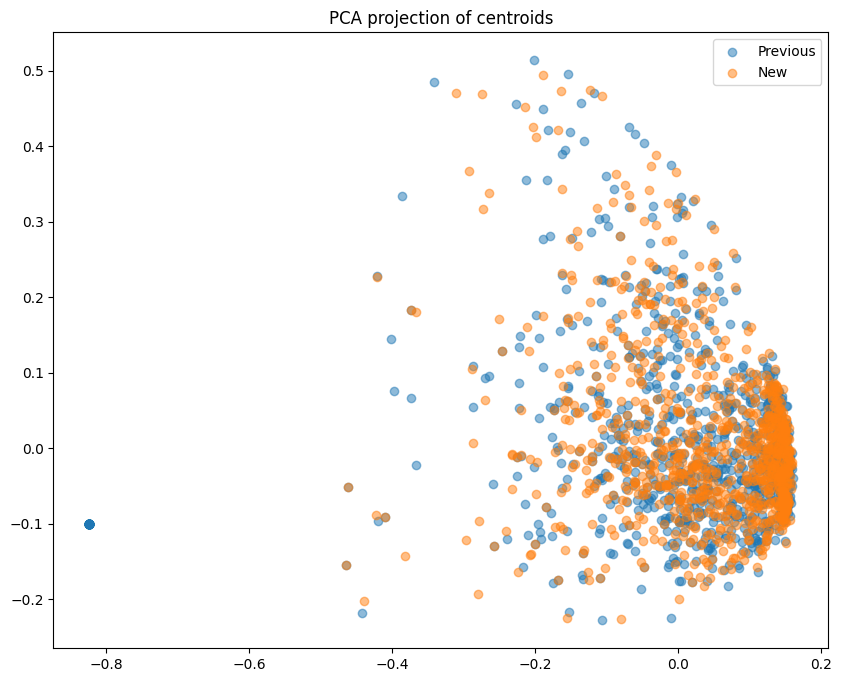

In [76]:
# Project to 2D
pca = PCA(n_components=2)
prev_2d = pca.fit_transform(_centroids.cpu().numpy())
new_2d = pca.transform(centroids.cpu().numpy())

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(prev_2d[:, 0], prev_2d[:, 1], alpha=0.5, label='Previous')
plt.scatter(new_2d[:, 0], new_2d[:, 1], alpha=0.5, label='New')
plt.legend()
plt.title('PCA projection of centroids')
plt.show()

I'm not super familiar with interpreting PCA plots, so I asked Claude what it thought about this result:

> I would describe this as showing "good structural similarity but with expected local variations." The centroids aren't identical (which would show perfect overlap), but they capture similar patterns in the embedding space. This suggests that while individual centroid positions differ, the overall index structure should perform similarly for retrieval tasks.

For now, I'll consider this part of indexing completing, as we have generated similar contents to what's in centroids.pt.

### _compute_avg_residual

This next section was quite eye opening for me, as it was the first time I understood how quantization is implemented.

The `ResidualCodec` does all of the compression/binarization/decompress of residuals.

In [77]:
compressor = ResidualCodec(config=config, centroids=centroids, avg_residual=None)
compressor

In [78]:
heldout_reconstruct = compressor.compress_into_codes(sample_heldout, out_device='cuda' )
heldout_reconstruct.shape

torch.Size([759])

`compress_into_codes` finds the nearest centroid IDs to the token embeddings. It does so using cosine similarity:

```python
indices = (self.centroids @ batch.T.cuda().half()).max(dim=0).indices.to(device=out_device)
```

In [79]:
heldout_reconstruct[:5]

tensor([633, 667, 738, 641, 443], device='cuda:0')

`lookup_centroids` gets the full vectors related to the centroid IDs in `heldout_reconstruct`

In [80]:
heldout_reconstruct = compressor.lookup_centroids(heldout_reconstruct, out_device='cuda')
heldout_reconstruct.shape

torch.Size([759, 96])

The residual between the heldout token embeddings and the closest centroids is then calculated:

In [81]:
heldout_avg_residual = sample_heldout.cuda() - heldout_reconstruct
heldout_avg_residual.shape

torch.Size([759, 96])

We then calculate the average residual vector (96 dimensions):

In [82]:
avg_residual = torch.abs(heldout_avg_residual).mean(dim=0).cpu()
avg_residual.shape

torch.Size([96])

The average residual is somewhat similar to the stored value in avg_residual.pt.

In [83]:
_avg_residual, avg_residual.mean()

(tensor(0.0150, device='cuda:0', dtype=torch.float16),
 tensor(0.0158, dtype=torch.float16))

To match the `RAG.index` defaults, I'm going to set `nbits` to 4.

In [84]:
config.nbits

1

In [85]:
config.nbits = 4
config.nbits

4

In [86]:
num_options = 2 ** config.nbits
config.nbits, num_options

(4, 16)

A 4-bit value has four 0 or 1 values and there are 16 possible combinations:

| Binary |
|--------|
| 0000   |
| 0001   |
| 0010   |
| 0011   |
| 0100   |
| 0101   |
| 0110   |
| 0111   |
| 1000   |
| 1001   |
| 1010   |
| 1011   |
| 1100   |
| 1101   |
| 1110   |
| 1111   |


We split 0-to-1 into 16 equal parts:

In [87]:
quantiles = torch.arange(0, num_options, device=heldout_avg_residual.device) * (1 / num_options)
quantiles.shape, quantiles

(torch.Size([16]),
 tensor([0.0000, 0.0625, 0.1250, 0.1875, 0.2500, 0.3125, 0.3750, 0.4375, 0.5000,
         0.5625, 0.6250, 0.6875, 0.7500, 0.8125, 0.8750, 0.9375],
        device='cuda:0'))

In [88]:
bucket_cutoffs_quantiles, bucket_weights_quantiles = quantiles[1:], quantiles + (0.5 / num_options)
bucket_cutoffs_quantiles, bucket_weights_quantiles

(tensor([0.0625, 0.1250, 0.1875, 0.2500, 0.3125, 0.3750, 0.4375, 0.5000, 0.5625,
         0.6250, 0.6875, 0.7500, 0.8125, 0.8750, 0.9375], device='cuda:0'),
 tensor([0.0312, 0.0938, 0.1562, 0.2188, 0.2812, 0.3438, 0.4062, 0.4688, 0.5312,
         0.5938, 0.6562, 0.7188, 0.7812, 0.8438, 0.9062, 0.9688],
        device='cuda:0'))

IIUC, the weights' quantiles are the midpoints between adjacent cutoffs' quantiles.

In [89]:
(bucket_cutoffs_quantiles[1] + bucket_cutoffs_quantiles[2])/2

tensor(0.1562, device='cuda:0')

In [90]:
(bucket_cutoffs_quantiles[3] + bucket_cutoffs_quantiles[4])/2

tensor(0.2812, device='cuda:0')

In [91]:
(bucket_cutoffs_quantiles[-2] + bucket_cutoffs_quantiles[-1])/2

tensor(0.9062, device='cuda:0')

In [92]:
bucket_cutoffs = heldout_avg_residual.float().quantile(bucket_cutoffs_quantiles)
bucket_weights = heldout_avg_residual.float().quantile(bucket_weights_quantiles)

IIUC, `bucket_cutoffs` are the values with which we can group our (flattened) `heldout_avg_residual`s into 16 equal groups. Visualized here by setting the bins to `bucket_cutoffs`.

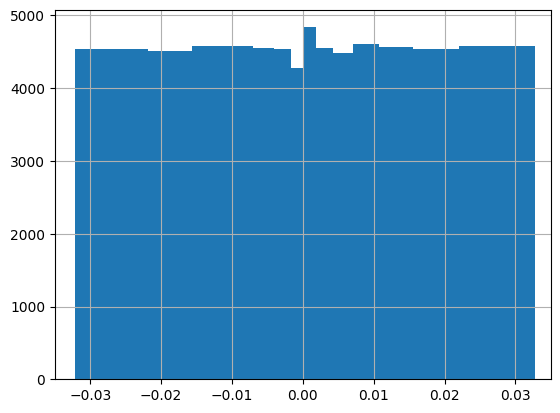

In [93]:
pd.Series(heldout_avg_residual.flatten().cpu()).hist(bins=bucket_cutoffs.cpu())
plt.xlim([-0.035, 0.035])
plt.show()

Perhaps due to randomness during the sample split, my manually calculated cutoffs are not quite the same as the `RAG.index` values.

In [94]:
bucket_cutoffs

tensor([-0.0322, -0.0219, -0.0156, -0.0108, -0.0070, -0.0040, -0.0017,  0.0000,
         0.0019,  0.0042,  0.0071,  0.0108,  0.0155,  0.0220,  0.0327],
       device='cuda:0')

In [95]:
_bucket_cutoffs

tensor([-0.0307, -0.0205, -0.0146, -0.0099, -0.0064, -0.0037, -0.0016,  0.0000,
         0.0017,  0.0038,  0.0066,  0.0102,  0.0150,  0.0211,  0.0313],
       device='cuda:0')

In [96]:
bucket_weights

tensor([-0.0434, -0.0261, -0.0185, -0.0131, -0.0088, -0.0054, -0.0028, -0.0009,
         0.0009,  0.0029,  0.0055,  0.0088,  0.0130,  0.0184,  0.0262,  0.0441],
       device='cuda:0')

In [97]:
_bucket_weights

tensor([-0.0411, -0.0247, -0.0173, -0.0121, -0.0081, -0.0050, -0.0026, -0.0007,
         0.0007,  0.0027,  0.0052,  0.0083,  0.0124,  0.0178,  0.0253,  0.0421],
       device='cuda:0', dtype=torch.float16)

There seems to be some rounding differences (or perhaps it depends on the distribution?) but the weights again seem to be the midpoints-ish between the cutoffs.

In [98]:
(bucket_cutoffs[0] + bucket_cutoffs[1])/2

tensor(-0.0270, device='cuda:0')

In [99]:
(bucket_cutoffs[3] + bucket_cutoffs[4])/2

tensor(-0.0089, device='cuda:0')

In [100]:
(bucket_cutoffs[-2] + bucket_cutoffs[-1])/2

tensor(0.0273, device='cuda:0')

## CollectionIndexer.index

Thus far we have found centroids from a sample of our token embeddings (5%, or 759) and calculated bucket cutoffs and bucket weights for quantization. We also know what the average residual mean value is.

Now we find the closest centroids and residuals for all passages' token embeddings, starting first by encoding all 15198 tokens with our model:

In [101]:
embs, doclens = encoder.encode_passages(collection)
embs.shape, len(doclens), doclens[:5]

[Mar 13, 01:18:21] [0] 		 #> Encoding 1000 passages..


/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()


(torch.Size([15198, 96]), 1000, [4, 20, 18, 23, 8])

Then we call `save_chunk` which is inside the [`IndexSaver`](https://github.com/stanford-futuredata/ColBERT/blob/7067ef598b5011edaa1f4a731a2c269dbac864e4/colbert/indexing/index_saver.py#L70) within which some interesting things take place:

```python
def save_chunk(self, chunk_idx, offset, embs, doclens):
        compressed_embs = self.codec.compress(embs)
```

Looking into `ResidualCodec.compress`:

```python
def compress(self, embs):
        codes, residuals = [], []

        for batch in embs.split(1 << 18):
            if self.use_gpu:
                batch = batch.cuda().half()
            codes_ = self.compress_into_codes(batch, out_device=batch.device)
            centroids_ = self.lookup_centroids(codes_, out_device=batch.device)

            residuals_ = (batch - centroids_)

            codes.append(codes_.cpu())
            residuals.append(self.binarize(residuals_).cpu())

        codes = torch.cat(codes)
        residuals = torch.cat(residuals)

        return ResidualCodec.Embeddings(codes, residuals)
```

We've seen `compress_into_codes` and `lookup_centroids` before:

In [102]:
codes_ = compressor.compress_into_codes(embs, out_device='cuda')
codes_.shape

torch.Size([15198])

These codes are the centroids ID closest to each token embeddings.

In [103]:
codes_[:5]

tensor([654, 843, 401, 654, 926], device='cuda:0')

We then get those 15198 centroid vectors:

In [104]:
centroids_ = compressor.lookup_centroids(codes_, out_device='cuda')
centroids_.shape

torch.Size([15198, 96])

A reminder that our centroids and our token embeddings are unit vectors:

In [105]:
centroids_[0].norm(), embs[0].norm()

(tensor(1., device='cuda:0', dtype=torch.float16),
 tensor(1., dtype=torch.float16))

We then find the residuals between token embeddings and centroids:

In [106]:
residuals_ = (embs.cpu() - centroids_.cpu())
residuals_.shape

torch.Size([15198, 96])

The next piece is _super cool_. We `binarize` the residuals, starting by using `bucketize`:

In [107]:
residuals = torch.bucketize(residuals_.float().cpu(), bucket_cutoffs.cpu()).to(dtype=torch.uint8)
residuals.shape

torch.Size([15198, 96])

In [108]:
residuals[0][:5]

tensor([8, 7, 7, 8, 7], dtype=torch.uint8)

In [109]:
residuals_[0][:5]

tensor([6.1035e-05, 0.0000e+00, 0.0000e+00, 1.9073e-06, 0.0000e+00],
       dtype=torch.float16)

In [144]:
residuals_[1][10:20]

tensor([ 0.0234, -0.0100,  0.0046, -0.0078, -0.0111,  0.0249, -0.0081, -0.0048,
         0.0270,  0.0037], dtype=torch.float16)

In [110]:
bucket_cutoffs[6:10]

tensor([-0.0017,  0.0000,  0.0019,  0.0042], device='cuda:0')

In [111]:
residuals.min(), residuals.max()

(tensor(0, dtype=torch.uint8), tensor(15, dtype=torch.uint8))

The values of `residuals` are now the ID (indices) of the buckets that the residual values fall into!

In [112]:
residuals = residuals.unsqueeze(-1).expand(*residuals.size(), config.nbits)
residuals.shape

torch.Size([15198, 96, 4])

We add a space for 4-bits per residual.

In [113]:
arange_bits = torch.arange(0, config.nbits, device='cuda', dtype=torch.uint8)
arange_bits

tensor([0, 1, 2, 3], device='cuda:0', dtype=torch.uint8)

In [114]:
residuals = residuals.cpu() >> arange_bits.cpu()
residuals.shape

torch.Size([15198, 96, 4])

In [115]:
residuals[0][:5]

tensor([[8, 4, 2, 1],
        [7, 3, 1, 0],
        [7, 3, 1, 0],
        [8, 4, 2, 1],
        [7, 3, 1, 0]], dtype=torch.uint8)

In [116]:
residuals = residuals & 1

In [117]:
residuals[0][:5]

tensor([[0, 0, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 1, 1, 0]], dtype=torch.uint8)

We have now converted the bucket ID into the actual 4-bit binary value it represents.

In [118]:
residuals_packed = np.packbits(np.asarray(residuals.contiguous().flatten()))
residuals_packed = torch.as_tensor(residuals_packed, dtype=torch.uint8)
residuals_packed = residuals_packed.reshape(residuals.size(0), config.dim // 8 * config.nbits)
residuals_packed.shape

torch.Size([15198, 48])

In [119]:
residuals_packed[0][:5]

tensor([ 30, 225, 225, 238, 238], dtype=torch.uint8)

In [120]:
f"30 in binary: {bin(30)[2:].zfill(8)}"

'30 in binary: 00011110'

For each residual vector with 96 values, each value is represented with 4-bits (e.g. 0, 0, 0, 1). Every 8 bits are stored into an integer (e.g. 0001 and 1110 concatenate to become the integer 30) so we have cut the number of values in half (from 96 to 48).

These residuals would be stored in 0.residuals.pt.

### _build_ivf

This is a critical piece---the mapping between passages and centroids!

In [121]:
codes = codes_.sort()
ivf, values = codes.indices, codes.values

Token embeddings IDs:

In [122]:
ivf

tensor([  936,  1171,  2363,  ..., 12051, 12147, 12161], device='cuda:0')

Centroid IDs:

In [123]:
values

tensor([   0,    0,    0,  ..., 1023, 1023, 1023], device='cuda:0')

In [124]:
ivf.shape, values.shape

(torch.Size([15198]), torch.Size([15198]))

`ivf` contains the token embedding ID (the indices of `codes_`) and `values` contains the centroid ID (the values of `codes_`).

We then get the number of tokens per centroid ID:

In [125]:
ivf_lengths = torch.bincount(values, minlength=num_partitions)
ivf_lengths

tensor([10, 11, 17,  ..., 17,  9, 29], device='cuda:0')

In [126]:
ivf_lengths.shape

torch.Size([1024])

In [127]:
ivf_lengths.sum()

tensor(15198, device='cuda:0')

### colbert/indexing/utils.py: optimize_ivf

We have 1000 documents containing a total of 15198 tokens.

In [128]:
total_num_embeddings = sum(doclens)
len(doclens), total_num_embeddings

(1000, 15198)

Instantiating an empty mapping between token embeddings IDs and passage IDs

In [129]:
emb2pid = torch.zeros(total_num_embeddings, dtype=torch.int)
emb2pid.shape

torch.Size([15198])

The indices of `doclens` are passage IDs `pid`. The values are the number of tokens in the document `dlength`.

In [130]:
offset_doclens = 0
for pid, dlength in enumerate(doclens):
    emb2pid[offset_doclens: offset_doclens + dlength] = pid
    offset_doclens += dlength

In [131]:
emb2pid.shape

torch.Size([15198])

The first 4 token embeddings correspond to the first passage, the next 20 token embeddings to the second passage, and so on.

In [132]:
emb2pid[:50]

tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 3], dtype=torch.int32)

Recall that `ivf` contained as values the token embeddings IDs which are the indices of `emb2pid`. The values of `emb2pid` are passage IDs. Indexing into `emb2pid` with `ivf` pulls out the passage IDs corresponding to tokens. Note that `ivf` is sorted by centroid ID.

In [133]:
ivf

tensor([  936,  1171,  2363,  ..., 12051, 12147, 12161], device='cuda:0')

In [134]:
values

tensor([   0,    0,    0,  ..., 1023, 1023, 1023], device='cuda:0')

In [135]:
new_ivf = emb2pid[ivf.cpu()]
new_ivf.shape, new_ivf[:5]

(torch.Size([15198]), tensor([ 55,  69, 143, 416, 471], dtype=torch.int32))

In [136]:
new_ivf

tensor([ 55,  69, 143,  ..., 795, 800, 800], dtype=torch.int32)

The first token embedding corresponding to centroid ID of 0 corresponds to passage ID 55.

In [137]:
emb2pid[936]

tensor(55, dtype=torch.int32)

`new_ivf` is a mapping from its indices (token embeddings) to values (passage IDs) which is now aligned to the `ivf_lengths` tensor which contains number of tokens per centroid ID (which came from `values`).

Next, we iterate through `ivf_lengths`, which contains the number of tokens per centroid ID. For each `length` we get the unique passages IDs from `new_ivf`, and append that to `unique_pids_per_centroid`. The number of unique pids for that centroid is added to `new_ivf_lengths`.

In [138]:
unique_pids_per_centroid = []
new_ivf_lengths = []

offset = 0
for length in tqdm.tqdm(ivf_lengths.tolist()):
    pids = torch.unique(new_ivf[offset:offset+length])
    unique_pids_per_centroid.append(pids)
    new_ivf_lengths.append(pids.shape[0])
    offset += length
ivf = torch.cat(unique_pids_per_centroid)
new_ivf_lengths = torch.tensor(new_ivf_lengths)

100%|██████████| 1024/1024 [00:00<00:00, 35975.77it/s]
<ipython-input-138-6c68981e98f9>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_ivf_lengths = torch.tensor(ivf_lengths)


In [139]:
ivf.shape, new_ivf_lengths.shape

(torch.Size([11593]), torch.Size([1024]))

Note that there are now fewer values in `ivf` than 15198 since we are only capturing the unique pids per centroid.

In [140]:
ivf[:5]

tensor([ 55,  69, 143, 416, 471], dtype=torch.int32)

In [141]:
new_ivf_lengths[:5]

tensor([10, 11, 17,  1, 34], device='cuda:0')

`new_ivf_lengths` is the count of unique passage IDs per centroid. So, for example the first 10 pids correspond to centroid ID `0`.

`ivf` and `new_ivf_lengths` would be stored in ivf.pid.pt.

After updating metadata, this completes the indexing process in RAGatouille and ColBERT!

## Final Thoughts

There were of course many details that I didn't fully explain in this walkthrough, and since I wasn't able to exactly replicate some of the indexing artifacts there may be some errors in my code, but I think I both covered and understood the main components to creating an index. Getting to this stage involved a _lot_ of discussion with Claude. I used AnswerAI's toolslm to create context from the RAGatouille and ColBERT repos to provide as Claude project knowledge. I also pored through the codebase for hours, making sure to trace my steps from method-to-method. While I could do more deep dives into the individual components of indexing, I feel satisfied with this walk through for now. I hope you enjoyed this blog post!